<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.317634,39.697329,36.984595,79.651018,-65.261096,199.389481,-202.329451,401.718932
1,0.0,1.0,53.073319,33.131086,29.105955,86.068721,-613.791018,-402.411937,-513.850159,111.438222
2,0.0,2.0,42.475925,93.173839,54.530867,62.652557,599.420279,862.253466,-1208.244008,2070.497474
3,0.0,3.0,82.570706,85.174969,43.617848,96.640347,-2953.355372,-2635.351502,-1255.666848,-1379.684655
4,0.0,4.0,49.620628,90.348318,80.070951,99.630682,-2763.866005,-2434.195427,-1103.022583,-1331.172844
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,35.638369,59.870299,75.149181,88.622452,-2807.017017,-2537.736717,-432.513603,-2105.223114
19996,999.0,16.0,48.521914,87.008363,28.807485,89.869897,-2447.928914,-2183.721255,712.004083,-2895.725338
19997,999.0,17.0,98.402114,67.376676,83.154207,57.047123,2888.035012,3204.015132,1817.659144,1386.355988
19998,999.0,18.0,64.126171,92.346324,29.921907,89.086596,6030.152135,6315.633133,1395.019151,4920.613982


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    98.317634  39.697329  36.984595  79.651018   -65.261096   
      1.0    53.073319  33.131086  29.105955  86.068721  -613.791018   
      2.0    42.475925  93.173839  54.530867  62.652557   599.420279   
      3.0    82.570706  85.174969  43.617848  96.640347 -2953.355372   
      4.0    49.620628  90.348318  80.070951  99.630682 -2763.866005   
...                ...        ...        ...        ...          ...   
999.0 15.0   35.638369  59.870299  75.149181  88.622452 -2807.017017   
      16.0   48.521914  87.008363  28.807485  89.869897 -2447.928914   
      17.0   98.402114  67.376676  83.154207  57.047123  2888.035012   
      18.0   64.126171  92.346324  29.921907  89.086596  6030.152135   
      19.0   84.454460  54.923922  63.739434  27.137755 -1153.783973   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     199.389481  -202.329451   401.718932  
      1.0    -402.411937  -513.850159   111.438222  
      2.0     862.253466 -1208.244008  2070.497474  
      3.0   -2635.351502 -1255.666848 -1379.684655  
      4.0   -2434.195427 -1103.022583 -1331.172844  
...                  ...          ...          ...  
999.0 15.0  -2537.736717  -432.513603 -2105.223114  
      16.0  -2183.721255   712.004083 -2895.725338  
      17.0   3204.015132  1817.659144  1386.355988  
      18.0   6315.633133  1395.019151  4920.613982  
      19.0   -913.528403   857.523395 -1771.051798  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    98.317634  39.697329  36.984595  79.651018   -65.261096   
      1.0    53.073319  33.131086  29.105955  86.068721  -613.791018   
      2.0    42.475925  93.173839  54.530867  62.652557   599.420279   
      3.0    82.570706  85.174969  43.617848  96.640347 -2953.355372   
      4.0    49.620628  90.348318  80.070951  99.630682 -2763.866005   
...                ...        ...        ...        ...          ...   
999.0 15.0   35.638369  59.870299  75.149181  88.622452 -2807.017017   
      16.0   48.521914  87.008363  28.807485  89.869897 -2447.928914   
      17.0   98.402114  67.376676  83.154207  57.047123  2888.035012   
      18.0   64.126171  92.346324  29.921907  89.086596  6030.152135   
      19.0   84.454460  54.923922  63.739434  27.137755 -1153.783973   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     199.389481  -202.329451   401.718932  
      1.0    -402.411937  -513.850159   111.438222  
      2.0     862.253466 -1208.244008  2070.497474  
      3.0   -2635.351502 -1255.666848 -1379.684655  
      4.0   -2434.195427 -1103.022583 -1331.172844  
...                  ...          ...          ...  
999.0 15.0  -2537.736717  -432.513603 -2105.223114  
      16.0  -2183.721255   712.004083 -2895.725338  
      17.0   3204.015132  1817.659144  1386.355988  
      18.0   6315.633133  1395.019151  4920.613982  
      19.0   -913.528403   857.523395 -1771.051798  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.317634,39.697329,36.984595,79.651018,-65.261096,199.389481,-202.329451,401.718932
1,0.0,1.0,53.073319,33.131086,29.105955,86.068721,-613.791018,-402.411937,-513.850159,111.438222
2,0.0,2.0,42.475925,93.173839,54.530867,62.652557,599.420279,862.253466,-1208.244008,2070.497474
3,0.0,3.0,82.570706,85.174969,43.617848,96.640347,-2953.355372,-2635.351502,-1255.666848,-1379.684655
4,0.0,4.0,49.620628,90.348318,80.070951,99.630682,-2763.866005,-2434.195427,-1103.022583,-1331.172844
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,35.638369,59.870299,75.149181,88.622452,-2807.017017,-2537.736717,-432.513603,-2105.223114
19996,999.0,16.0,48.521914,87.008363,28.807485,89.869897,-2447.928914,-2183.721255,712.004083,-2895.725338
19997,999.0,17.0,98.402114,67.376676,83.154207,57.047123,2888.035012,3204.015132,1817.659144,1386.355988
19998,999.0,18.0,64.126171,92.346324,29.921907,89.086596,6030.152135,6315.633133,1395.019151,4920.613982


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    98.317634  39.697329  36.984595  79.651018   -65.261096   
      1.0    53.073319  33.131086  29.105955  86.068721  -613.791018   
      2.0    42.475925  93.173839  54.530867  62.652557   599.420279   
      3.0    82.570706  85.174969  43.617848  96.640347 -2953.355372   
      4.0    49.620628  90.348318  80.070951  99.630682 -2763.866005   
...                ...        ...        ...        ...          ...   
999.0 15.0   35.638369  59.870299  75.149181  88.622452 -2807.017017   
      16.0   48.521914  87.008363  28.807485  89.869897 -2447.928914   
      17.0   98.402114  67.376676  83.154207  57.047123  2888.035012   
      18.0   64.126171  92.346324  29.921907  89.086596  6030.152135   
      19.0   84.454460  54.923922  63.739434  27.137755 -1153.783973   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     199.389481  -202.329451   401.718932  
      1.0    -402.411937  -513.850159   111.438222  
      2.0     862.253466 -1208.244008  2070.497474  
      3.0   -2635.351502 -1255.666848 -1379.684655  
      4.0   -2434.195427 -1103.022583 -1331.172844  
...                  ...          ...          ...  
999.0 15.0  -2537.736717  -432.513603 -2105.223114  
      16.0  -2183.721255   712.004083 -2895.725338  
      17.0   3204.015132  1817.659144  1386.355988  
      18.0   6315.633133  1395.019151  4920.613982  
      19.0   -913.528403   857.523395 -1771.051798  

[20000 rows x 8 columns]

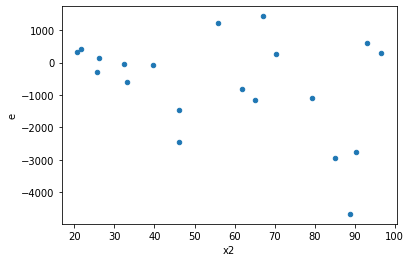

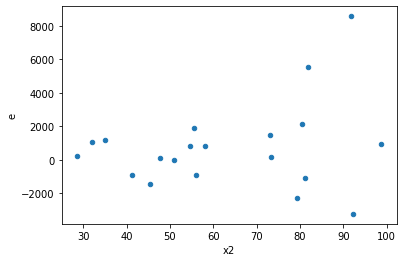

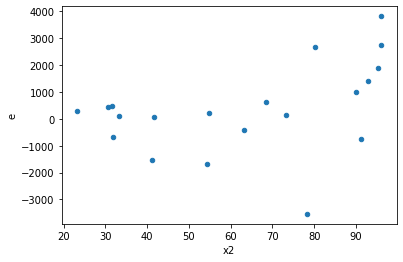

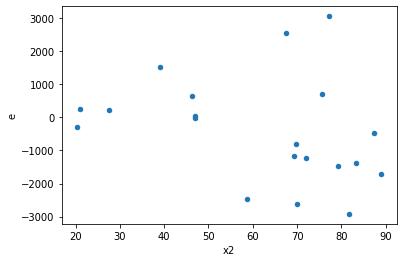

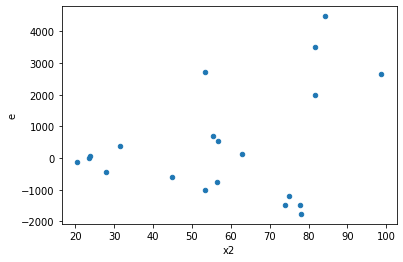

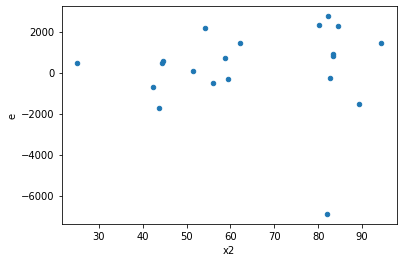

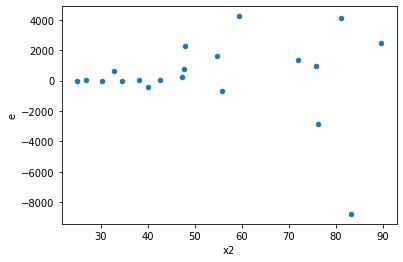

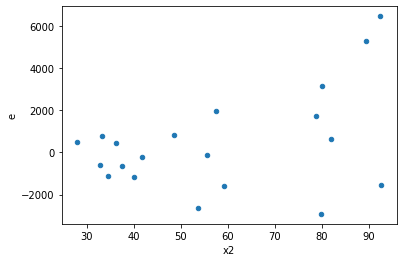

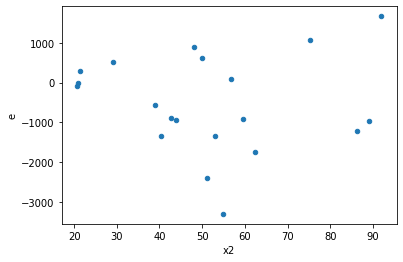

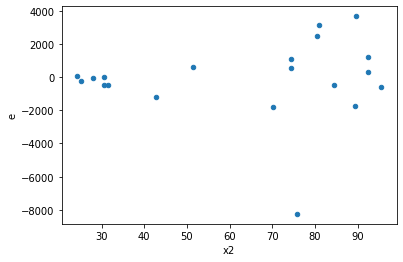

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,5.0,7.0,3096763.993277765,17317293.893052932,619352.798655553,2473899.12757899,3.994329456408616,0.09868568068838734,0.9506571596558063,0.04934284034419367,Reject001=1 : Homoscedasticity
4.0,10.0,2.0,13464884.853340976,6256487.660238315,1346488.4853340976,3128243.8301191577,2.32326073649487,0.6765452087218704,0.6617273956390648,0.3382726043609352,Reject001=1 : Homoscedasticity
9.0,2.0,10.0,780290.3061837999,48068043.7460305,390145.15309189993,4806804.37460305,12.320553866962412,0.004009323870633352,0.9979953380646833,0.002004661935316676,Reject001=0 : Heteroscedasticity
10.0,1.0,11.0,2.6728273543119707e-23,53032497.638311975,2.6728273543119707e-23,4821136.148937453,1.8037589076450064e+29,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
11.0,9.0,3.0,10020545.339464502,17035717.32182784,1113393.9266071669,5678572.44060928,5.100236587344725,0.20708346967062807,0.896458265164686,0.10354173483531404,Reject001=1 : Homoscedasticity
12.0,3.0,9.0,3053939.2162427236,46554072.814713046,1017979.7387475745,5172674.757190338,5.081314057934302,0.04991544547903537,0.9750422772604823,0.024957722739517685,Reject001=1 : Homoscedasticity
20.0,8.0,4.0,5248535.169618531,4197331.9077082025,656066.8962023164,1049332.9769270506,1.5994298493052754,0.6844498646791166,0.6577750676604417,0.3422249323395583,Reject001=1 : Homoscedasticity
21.0,1.0,11.0,4.512601436839214e-22,5275434.710918822,4.512601436839214e-22,479584.97371989297,1.0627682954775003e+27,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
22.0,9.0,3.0,7926734.730181019,4699125.858721722,880748.3033534465,1566375.286240574,1.7784596124416077,0.6934410022140822,0.6532794988929589,0.3467205011070411,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,3.0,28158897.486065146,563676.6767963483,3128766.3873405717,187892.22559878277,0.06005313351582307,0.0010268901689565086,Reject001=0 : Heteroscedasticity
1.0,5.0,7.0,61102474.14250692,6277896.448117904,12220494.828501385,896842.3497311292,0.07338838257510316,0.010992598452084845,Reject001=1 : Homoscedasticity
2.0,5.0,7.0,3096763.993277765,17317293.893052932,619352.798655553,2473899.12757899,3.994329456408616,0.09868568068838734,Reject001=1 : Homoscedasticity
3.0,9.0,3.0,34498387.71422202,66879.14717337045,3833154.1904691136,22293.04905779015,0.005815849806725843,5.8175716089397094e-08,Reject001=0 : Heteroscedasticity
4.0,10.0,2.0,13464884.853340976,6256487.660238315,1346488.4853340976,3128243.8301191577,2.32326073649487,0.6765452087218704,Reject001=1 : Homoscedasticity
5.0,8.0,4.0,53185726.614626475,2500675.904079891,6648215.826828309,625168.9760199727,0.09403560177711988,0.005484193767930001,Reject001=0 : Heteroscedasticity
6.0,12.0,1.0,39281772.325586766,4.040583421865473e-23,3273481.0271322303,4.040583421865473e-23,1.2343384270063332e-29,4.76469375673541e-168,Reject001=0 : Heteroscedasticity
7.0,5.0,7.0,52878461.3414737,5374875.807122871,10575692.26829474,767839.401017553,0.07260417394324976,0.010725531791876124,Reject001=1 : Homoscedasticity
8.0,7.0,5.0,16763668.001975033,4223086.224639183,2394809.714567862,844617.2449278366,0.3526865787247927,0.20685100333859177,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      705
Reject001=0 : Heteroscedasticity    295
Name: Result_test, dtype: int64